In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter

In [2]:
# Load datasets
ingredients_df = pd.read_csv("Cleaned_datasets/ingredients_data_cleaned.csv")
sales_df = pd.read_csv("Cleaned_datasets/sales_data_cleaned.csv")

#### basic stats

In [3]:
sales_df.describe()


,pizza_id,order_id,quantity,unit_price,total_price,day_of_week,is_weekend
count,47599.000000,47599.000000,47599.0,47599.000000,47599.000000,47599.000000,47599.000000
mean,24337.477720,10713.379357,1.0,16.478359,16.478359,3.001513,0.274102
std,14019.176865,6172.917075,0.0,3.591838,3.591838,1.949744,0.446066
min,1.000000,1.000000,1.0,9.750000,9.750000,0.000000,0.000000
25%,12187.500000,5351.500000,1.0,12.750000,12.750000,1.000000,0.000000
50%,24341.000000,10701.000000,1.0,16.500000,16.500000,3.000000,0.000000
75%,36474.500000,16103.500000,1.0,20.250000,20.250000,5.000000,1.000000
max,48620.000000,21350.000000,1.0,25.500000,25.500000,6.000000,1.000000


### Analyze Data Distribution

##### Distribution of Pizza Sales by Category

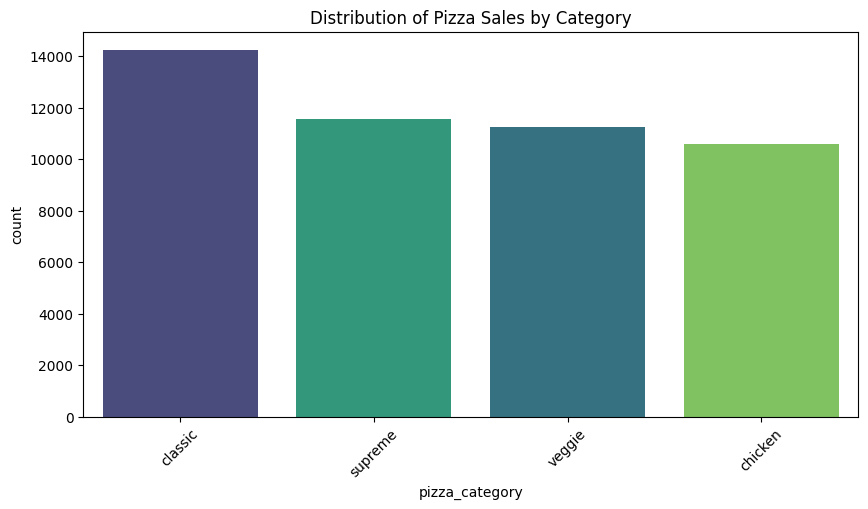

In [4]:
plt.figure(figsize=(10,5))
sns.countplot(data=sales_df, x="pizza_category", hue="pizza_category", order=sales_df["pizza_category"].value_counts().index, palette="viridis", legend=False)
plt.title("Distribution of Pizza Sales by Category")
plt.xticks(rotation=45)
plt.show()

####  Distribution of Pizza Sizes

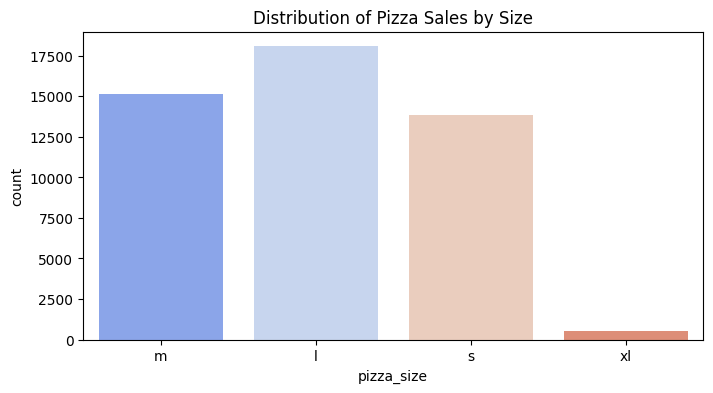

In [5]:
plt.figure(figsize=(8,4))
sns.countplot(data=sales_df, x="pizza_size", hue="pizza_size", palette="coolwarm", legend=False)
plt.title("Distribution of Pizza Sales by Size")
plt.show()

#### Total Sales Distribution

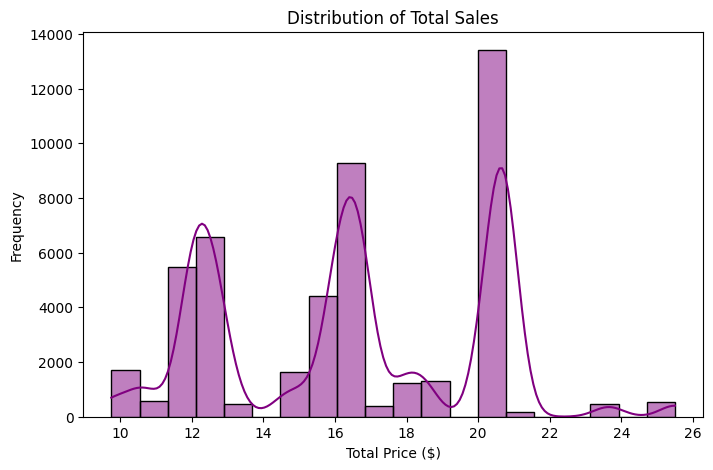

In [6]:
plt.figure(figsize=(8,5))
sns.histplot(sales_df["total_price"], bins=20, kde=True, color='purple')
plt.title("Distribution of Total Sales")
plt.xlabel("Total Price ($)")
plt.ylabel("Frequency")
plt.show()

### Time Series Analysis

Quantity sold over time

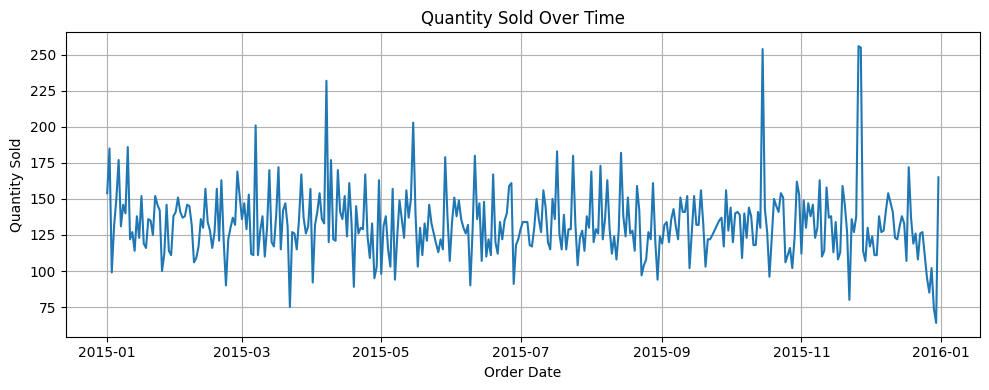

In [7]:
sales_df['order_date'] = pd.to_datetime(sales_df['order_date'])

# Group by order date and sum the quantity
quantity_over_time = sales_df.groupby('order_date')['quantity'].sum()

# Create plot
plt.figure(figsize=(10, 4))
plt.plot(quantity_over_time.index, quantity_over_time.values)
plt.xlabel('Order Date')
plt.ylabel('Quantity Sold')
plt.title('Quantity Sold Over Time')

# Display grid and tight layout
plt.grid(True)
plt.tight_layout()
plt.show()


#### Sales Trend by Day of the Week

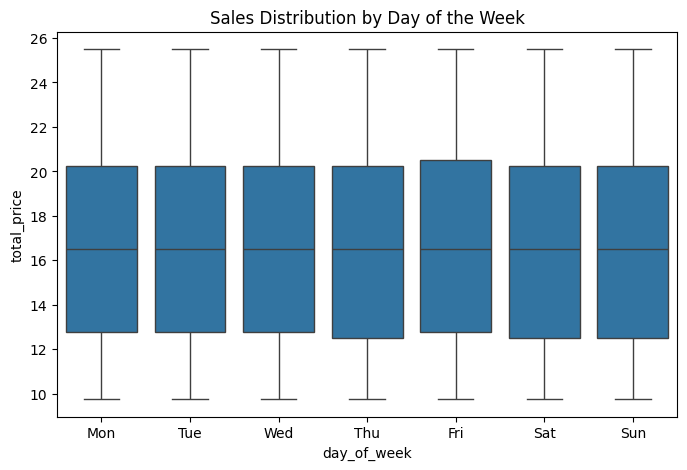

In [8]:
plt.figure(figsize=(8,5))
sns.boxplot(data=sales_df, x="day_of_week", y="total_price")
plt.title("Sales Distribution by Day of the Week")
plt.xticks(ticks=range(7), labels=["Mon", "Tue", "Wed", "Thu", "Fri", "Sat", "Sun"])
plt.show()

#### Top 10 Most Frequent Ingredients in Sales Data

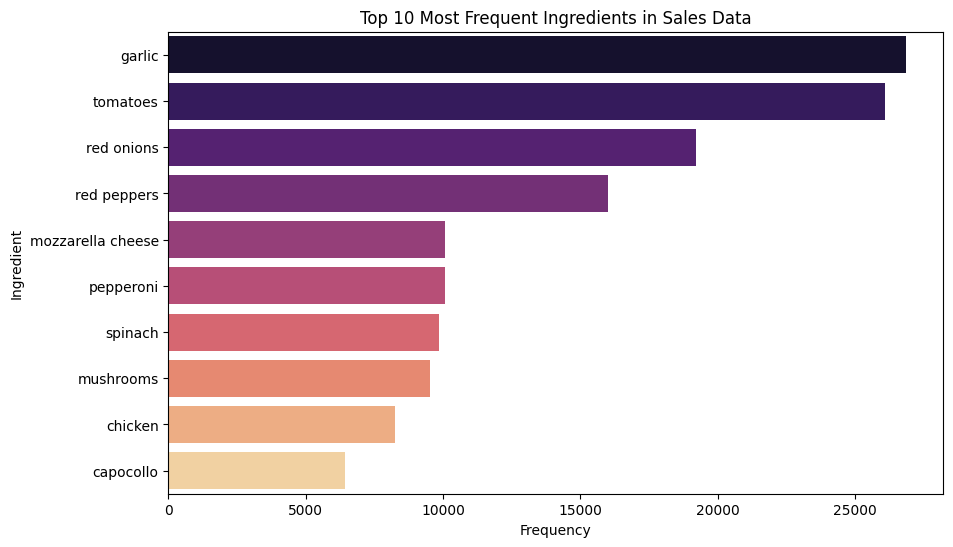

In [9]:
# Split, strip whitespace, and convert ingredients to lowercase
ingredients = sales_df['pizza_ingredients'].str.split(',')
ingredients = [ingredient.strip().lower() for sublist in ingredients for ingredient in sublist]

# Count frequency and get top 10 ingredients
top10 = Counter(ingredients).most_common(10)
top10_df = pd.DataFrame(top10, columns=['Ingredient', 'Count'])

plt.figure(figsize=(10, 6))
sns.barplot(data=top10_df, x="Count", y="Ingredient", hue="Ingredient", palette="magma", dodge=False)
plt.title("Top 10 Most Frequent Ingredients in Sales Data")
plt.xlabel("Frequency")
plt.ylabel("Ingredient")
plt.show()